#Phase 1 : Compréhension et Chargement des Données

Tâche 1.1 : Chargement du DataFrame

In [ ]:
#Importer pandas et numpy
import pandas as pd
import numpy as np
#Lire le csv
df_events=pd.read_csv('cybersecurity_events.csv')

In [ ]:
#Afficher la data
df_events.head(10)

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score
0,2024-08-01 11:40:27,122.29.127.224,122.29.142.151,Firewall Deny,ICMP,21067,USER_83,Allow,4379.99,45.91
1,2024-12-25 08:44:59,33.164.108.98,33.164.245.211,File Access,HTTP,61860,user_185,Allow,NaN,23.84
2,2024-01-06 12:21:38,146.254.97.220,146.254.67.25,Login,TCP,35005,user_53,Failed,758.19,30.88
3,2024-05-20 00:09:38,124.118.11.159,124.118.14.167,Service Start,TCP,63612,user_175,Allow,1828.74,37.24
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,Malware Alert,SSH,26191,user_149,Allow,386.08,100.00
5,2024-06-20 05:50:03,197.56.101.247,86.111.225.216,File Access,HTTPS,2270,user-48,Allow,1566.56,29.28
6,2024-03-30 11:00:50,49.162.95.28,49.162.35.226,login_attempt,HTTPS,7681,NaN,Deny,646.44,29.11
7,2024-09-10 05:19:20,209.83.212.235,209.83.63.245,Malware Alert,HTTPS,35200,user_110,Failed,1171.37,100.00
8,2024-09-16 01:14:48,73.76.56.60,73.76.116.85,Login,UDP,25,user-166,Allow,1486.37,20.22
9,2024-07-29 14:03:41,180.48.205.174,180.48.248.198,Login,HTTP,N/A_PORT,user_128,Failed,large_payload,49.60


Tâche 1.2 : Inspection Initiale

> Ajouter une citation



In [ ]:
#Obtenez un résumé des informations du DataFrame pour voir les types de données
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        5000 non-null   object 
 1   source_ip        4966 non-null   object 
 2   destination_ip   4848 non-null   object 
 3   event_type       4961 non-null   object 
 4   protocol         4773 non-null   object 
 5   port             4756 non-null   object 
 6   username         4850 non-null   object 
 7   action           4943 non-null   object 
 8   payload_size_kb  4603 non-null   object 
 9   risk_score       4893 non-null   float64
dtypes: float64(1), object(9)
memory usage: 390.8+ KB


In [ ]:
#Affichez les 5 premières lignes du DataFrame.
df_events.head()

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score
0,2024-08-01 11:40:27,122.29.127.224,122.29.142.151,Firewall Deny,ICMP,21067,USER_83,Allow,4379.99,45.91
1,2024-12-25 08:44:59,33.164.108.98,33.164.245.211,File Access,HTTP,61860,user_185,Allow,NaN,23.84
2,2024-01-06 12:21:38,146.254.97.220,146.254.67.25,Login,TCP,35005,user_53,Failed,758.19,30.88
3,2024-05-20 00:09:38,124.118.11.159,124.118.14.167,Service Start,TCP,63612,user_175,Allow,1828.74,37.24
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,Malware Alert,SSH,26191,user_149,Allow,386.08,100.00


In [ ]:
#Affichez les dimensions du DataFrame.
df_events.shape

(5000, 10)

In [ ]:
#Listez les noms des colonnes (.columns).
df_events.columns


Index(['timestamp', 'source_ip', 'destination_ip', 'event_type', 'protocol',
       'port', 'username', 'action', 'payload_size_kb', 'risk_score'],
      dtype='object')

In [ ]:
#Calculez le nombre de valeurs manquantes pour chaque colonne.
df_events.isna().sum().sort_values(ascending=False)

,0
payload_size_kb,397
port,244
protocol,227
destination_ip,152
username,150
risk_score,107
action,57
event_type,39
source_ip,34
timestamp,0


# Phase 2 : Prétraitement et Nettoyage des Données

Tâche 2.1 : Nettoyage des Noms de Colonnes

In [ ]:
#S'Assurer que tous les noms de colonnes n'ont pas d'espaces en début ou fin, ni de caractères spéciaux indésirables
df_events.columns=df_events.columns.str.strip().str.replace(" ","_").str.lower()

Tâche 2.2 : Gestion des Valeurs Manquantes (Imputation)

In [ ]:
#Analysez le pourcentage de NaNs par colonne
df_events.isna().mean()*100

,0
timestamp,0.00
source_ip,0.68
destination_ip,3.04
event_type,0.78
protocol,4.54
port,4.88
username,3.00
action,1.14
payload_size_kb,7.94
risk_score,2.14


In [ ]:
#Convertissez d'abord les chaînes non numériques en NaN.
df_events[["port", "payload_size_kb", "risk_score"]] = df_events[["port", "payload_size_kb", "risk_score"]].apply(pd.to_numeric, errors="coerce")

In [ ]:
#afficher les NaN génerés
df_events.isna().mean()*100

,0
timestamp,0.00
source_ip,0.68
destination_ip,3.04
event_type,0.78
protocol,4.54
port,7.28
username,3.00
action,1.14
payload_size_kb,10.72
risk_score,2.14


In [ ]:
# Statistiques Descriptives des Données Numériques
df_events.describe()

,port,payload_size_kb,risk_score
count,4636.000000,4464.000000,4893.000000
mean,30079.563417,5558.514433,36.201606
std,20324.032501,36906.796380,22.551902
min,21.000000,-10.000000,0.050000
25%,11698.000000,1223.692500,19.660000
50%,29602.000000,2499.280000,33.790000
75%,47772.750000,3821.140000,47.620000
max,65531.000000,500000.000000,100.000000


In [ ]:
#Imputez les NaNs avec la médiane pour éviter la sensibilité aux outliers.
df_events[["port", "payload_size_kb"]]=df_events[["port", "payload_size_kb"]].fillna(df_events[["port", "payload_size_kb"]].median())
#Supprimer les nan de la colonne cible pour un meilleur model
df_events=df_events.dropna(subset=["risk_score"])

In [ ]:
#Afficher la data pour consulter les changements
df_events

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score
0,2024-08-01 11:40:27,122.29.127.224,122.29.142.151,Firewall Deny,ICMP,21067.0,USER_83,Allow,4379.99,45.91
1,2024-12-25 08:44:59,33.164.108.98,33.164.245.211,File Access,HTTP,61860.0,user_185,Allow,2499.28,23.84
2,2024-01-06 12:21:38,146.254.97.220,146.254.67.25,Login,TCP,35005.0,user_53,Failed,758.19,30.88
3,2024-05-20 00:09:38,124.118.11.159,124.118.14.167,Service Start,TCP,63612.0,user_175,Allow,1828.74,37.24
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,Malware Alert,SSH,26191.0,user_149,Allow,386.08,100.00
...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-11 01:03:53,53.182.6.91,53.182.220.117,Network Scan,FTP,64281.0,user_153,Deny,3508.46,85.18
4996,2024-09-26 09:47:06,85.95.97.199,136.1.229.253,Firewall Deny,FTP,80.0,user_161,Allow,3792.51,16.96
4997,2024-10-06 20:29:44,134.210.23.102,251.75.195.83,Service Start,HTTPS,42985.0,NaN,Allow,3937.05,44.06
4998,2024-12-04 08:08:12,151.21.135.134,151.21.232.123,Firewall Deny,HTTP,37072.0,user_41,Blocked,160.84,37.57


In [ ]:
#Nettoyé et enrichi la colonne timestamp.
from datetime import datetime
df_events["timestamp"]=pd.to_datetime(df_events["timestamp"],errors="coerce")

In [ ]:
#calculer le nombre des Nan généré par le chanegement en datetime
print(df_events["timestamp"].isna().mean()*100)

11.996730022481096


In [ ]:
#Imputer la colone avec mode
df_events["timestamp"]=df_events["timestamp"].fillna(df_events["timestamp"].mode()[0])
#Afficher les le nombre des Nan:
print("NaNs dans 'timestamp' après imputation :")
print(df_events['timestamp'].isnull().sum())
#afficher le type de la colonne
print(f"Le type de la colonne 'timestamp' est maintenant : {df_events['timestamp'].dtype}")

NaNs dans 'timestamp' après imputation :
0
Le type de la colonne 'timestamp' est maintenant : datetime64[ns]


Tâche 2.3 (Suite) : Extraction des caractéristiques temporelles

In [ ]:
#Créer une colonne hour_of_day (l'heure de l'événement, de 0 à 23).
df_events['heure_evenement']=df_events['timestamp'].dt.hour
#Créer une colonne day_of_week (le jour de la semaine, de 0 pour lundi à 6 pour dimanche).
df_events['day_of_week']=df_events['timestamp'].dt.dayofweek
#Créer une colonne is_weekend (une colonne booléenne : True si l'événement a lieu un samedi ou un dimanche, False sinon).

In [ ]:
df_events['is_weekend']=df_events['day_of_week'].apply(lambda x: True if x==5 or x==6 else False)
#méthode 2: df_events['is_weekend']=df_events['day_of_week'].isin([5,6])
#Créer une colonne month (le mois de l'année, de 1 à 12).
df_events['month']=df_events['timestamp'].dt.month
#Optionnel, mais recommandé pour un projet "top" : Créer une colonne time_of_day_category qui catégorise l'heure (ex: 'Morning', 'Afternoon', 'Evening', 'Night')
def category(heure):
  if 5<=heure<12:
    return "morning"
  if 12<=heure<18:
    return 'Afternoon'
  if 18<=heure<21:
    return 'Evening'
  else :
     return 'Night'
# Appliquez cette fonction à la colonne 'heure_evenement'
df_events['time_of_day_category']=df_events['heure_evenement'].apply(category)


In [ ]:
#Afficher encore la data pour consulter les changement :
df_events.head(10)

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score,heure_evenement,day_of_week,is_weekend,month,time_of_day_category
0,2024-08-01 11:40:27,122.29.127.224,122.29.142.151,Firewall Deny,ICMP,21067.0,USER_83,Allow,4379.99,45.91,11,3,False,8,morning
1,2024-12-25 08:44:59,33.164.108.98,33.164.245.211,File Access,HTTP,61860.0,user_185,Allow,2499.28,23.84,8,2,False,12,morning
2,2024-01-06 12:21:38,146.254.97.220,146.254.67.25,Login,TCP,35005.0,user_53,Failed,758.19,30.88,12,5,True,1,Afternoon
3,2024-05-20 00:09:38,124.118.11.159,124.118.14.167,Service Start,TCP,63612.0,user_175,Allow,1828.74,37.24,0,0,False,5,Night
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,Malware Alert,SSH,26191.0,user_149,Allow,386.08,100.00,21,2,False,4,Night
5,2024-06-20 05:50:03,197.56.101.247,86.111.225.216,File Access,HTTPS,2270.0,user-48,Allow,1566.56,29.28,5,3,False,6,morning
6,2024-03-30 11:00:50,49.162.95.28,49.162.35.226,login_attempt,HTTPS,7681.0,NaN,Deny,646.44,29.11,11,5,True,3,morning
7,2024-09-10 05:19:20,209.83.212.235,209.83.63.245,Malware Alert,HTTPS,35200.0,user_110,Failed,1171.37,100.00,5,1,False,9,morning
8,2024-09-16 01:14:48,73.76.56.60,73.76.116.85,Login,UDP,25.0,user-166,Allow,1486.37,20.22,1,0,False,9,Night
9,2024-07-29 14:03:41,180.48.205.174,180.48.248.198,Login,HTTP,29602.0,user_128,Failed,2499.28,49.60,14,0,False,7,Afternoon


Tâche 2.4 : Nettoyage et Feature Engineering des IPs (source_ip, destination_ip)
Nettoyez les espaces blancs en début/fin des adresses IP.

In [ ]:
#Convertir les colonne en str
df_events[['source_ip', 'destination_ip']]=df_events[['source_ip', 'destination_ip']].apply(lambda x: x.astype(str))
#Enelver les esapce au début et la fin
df_events[['source_ip', 'destination_ip']]=df_events[['source_ip', 'destination_ip']].apply(lambda x: x.str.strip())

Utiliser ip.address pour filtrer :

In [ ]:
#importer les librairies
import numpy as np
import re
import ipaddress
# Créez une nouvelle colonne is_private_source_ip (booléen : True si l'IP source est privée - 10.0.0.0/8, 172.16.0.0/12, 192.168.0.0/16).
def private(ip):
  try:
    # Tente de convertir la chaîne en un objet adresse IP.
    # Ceci est approprié si votre colonne 'source_ip' contient des adresses individuelles.
    adress = ipaddress.ip_address(ip)
    # L'attribut .is_private vérifie si l'adresse est dans les plages privées standards (RFC 1918).
    return adress.is_private
  except ValueError:
    # Retourne False si la chaîne n'est pas une adresse IP valide (ex: mal formatée, ou 'nan' string)
    return False
  except TypeError:
    # Retourne False si l'entrée n'est pas une chaîne (ex: un vrai np.nan avant conversion)
    return False

# Appliquez la fonction à votre colonne 'source_ip' pour créer la nouvelle colonne.
df_events['is_private_source_ip'] = df_events['source_ip'].apply(private)

In [ ]:
#Créez une nouvelle colonne is_private_source_ip (booléen : True si l'IP source est privée de même pour 'destination_ip.
import ipaddress
#Créer une fonction identifier les adresse ip private
def priv(ip):
  try:
    add=ipaddress.ip_address(ip)
    return add.is_private
  except ValueError:
    return False
  except TypeError:
    return False
#Créer une nouvelle colonne pour diffirencer private ou non
df_events['is_private_destination_ip'] = df_events['destination_ip'].apply(priv)


In [ ]:
#Créez une colonne source_ip_class et destination_ip_class (Catégories : 'A', 'B', 'C', 'Private', 'Other'/'Invalid'). (Ex: classe A commence par 0-127, B par 128-191, C par 192-223).
import ipaddress
# import re # Pas nécessaire pour cette version, mais utile si vous l'utilisez ailleurs
import numpy as np # Utile si vous avez des valeurs np.nan non converties en string

def classe(ip):
  try :
    # 1. Tenter de convertir l'entrée en un objet adresse IP.
    # Ceci interceptera les chaînes non valides comme 'nan', '', ou mal formées.
    add = ipaddress.ip_address(ip)

    # 2. **Vérification PRIORITAIRE : Est-ce une IP privée ?**
    # Si c'est le cas, la fonction retourne "Private" et s'arrête.
    if add.is_private:
      return "Private"

    # 3. Si l'IP n'est PAS privée, alors on détermine sa classe publique (A, B, C, ou Other).
    # On obtient le premier octet de l'adresse IP à partir de sa représentation en chaîne.
    first_octet = int(str(add).split(".")[0])

    # 4. Classification selon le premier octet (pour les IP non privées)
    if 0 <= first_octet <= 127: # Plage standard de la Classe A
      return "A"
    elif 128 <= first_octet <= 191: # Plage standard de la Classe B
      return "B"
    elif 192 <= first_octet <= 223: # Plage standard de la Classe C
      return "C"
    else:
      # Pour les IP valides en dehors des plages A, B, C traditionnelles (ex: multicast, expérimental, etc.)
      return 'Other'

  except (ValueError, TypeError):
    # Ce bloc attrape toute erreur si l'entrée n'est pas une IP valide.
    return "Invalid"

# Appliquez cette fonction à vos deux colonnes d'adresses IP pour créer les nouvelles colonnes
df_events['source_ip_class'] = df_events['source_ip'].apply(classe)
df_events['destination_ip_class'] = df_events['destination_ip'].apply(classe)

# Vérifions les résultats pour s'assurer que tout est correct
print("---")
print("Classes des IP Source et Destination :")
print(df_events[['source_ip', 'source_ip_class', 'destination_ip', 'destination_ip_class']].head())
print("\nComptage des valeurs pour 'source_ip_class' :")
print(df_events['source_ip_class'].value_counts())
print("\nComptage des valeurs pour 'destination_ip_class' :")
print(df_events['destination_ip_class'].value_counts())
print("---")



---
Classes des IP Source et Destination :
         source_ip source_ip_class  destination_ip destination_ip_class
0   122.29.127.224               A  122.29.142.151                    A
1    33.164.108.98               A  33.164.245.211                    A
2   146.254.97.220               B   146.254.67.25                    B
3   124.118.11.159               A  124.118.14.167                    A
4  234.211.148.236           Other  234.211.10.183                Other

Comptage des valeurs pour 'source_ip_class' :
source_ip_class
A          2270
B          1215
C           602
Private     438
Other       289
Invalid      79
Name: count, dtype: int64

Comptage des valeurs pour 'destination_ip_class' :
destination_ip_class
A          2141
B          1141
C           568
Private     416
Invalid     352
Other       275
Name: count, dtype: int64
---


In [ ]:
#Afficher la data pour consulter les changements
df_events.head()

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score,heure_evenement,day_of_week,is_weekend,month,time_of_day_category,is_private_source_ip,is_private_destination_ip,source_ip_class,destination_ip_class
0,2024-08-01 11:40:27,122.29.127.224,122.29.142.151,Firewall Deny,ICMP,21067.0,USER_83,Allow,4379.99,45.91,11,3,False,8,morning,False,False,A,A
1,2024-12-25 08:44:59,33.164.108.98,33.164.245.211,File Access,HTTP,61860.0,user_185,Allow,2499.28,23.84,8,2,False,12,morning,False,False,A,A
2,2024-01-06 12:21:38,146.254.97.220,146.254.67.25,Login,TCP,35005.0,user_53,Failed,758.19,30.88,12,5,True,1,Afternoon,False,False,B,B
3,2024-05-20 00:09:38,124.118.11.159,124.118.14.167,Service Start,TCP,63612.0,user_175,Allow,1828.74,37.24,0,0,False,5,Night,False,False,A,A
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,Malware Alert,SSH,26191.0,user_149,Allow,386.08,100.00,21,2,False,4,Night,False,False,Other,Other


Tâche 2.5 : Nettoyage et Standardisation de username

In [ ]:
#Convertissez tous les noms d'utilisateurs en minuscules et supprimez les espaces superflus.
df_events['username']=df_events['username'].str.strip().str.lower()


In [ ]:
#Explorer la colonne user name pour savoir comment la nettoyer
df_events['username'].unique()

array(['user_83', 'user_185', 'user_53', 'user_175', 'user_149',
       'user-48', nan, 'user_110', 'user-166', 'user_128', 'user_150',
       'user_205', 'user_179', 'user_37', 'user_230', 'user_31',
       'user_64', 'user_143', 'user_16', 'user_214', 'user_224',
       'user_169', 'user_79', 'user_148', 'user_201', 'user_204',
       'user_244', 'user_171', 'user_126', 'user_48', 'user_76',
       'user_161', 'user-223', 'user_176', 'user_236', 'user_46',
       'user_172', 'user-23', 'user_133', 'user_43', 'user_211',
       'user_99', 'user_225', 'user_194', 'user_72', 'user_187',
       'user-99', 'user_227', 'user_121', 'user-111', 'user_95',
       'user_182', 'user_17', 'user_166', 'user_25', 'user_229',
       'user-198', 'user_33', 'user_140', 'user_85', 'user_237',
       'user_96', 'user_80', 'user_122', 'user_14', 'user_75', 'user_61',
       'user_178', 'user_69', 'user_2', 'user_19', 'user_220', 'user_243',
       'user_130', 'user_240', 'user_45', 'user_82', 'user_63',

In [ ]:
#Convertissez tous les noms d'utilisateurs en minuscules et supprimez les espaces superflus.
df_events["username"]=df_events["username"].str.replace("-","_").str.strip("_")

Tâche 2.6 : Nettoyage et Standardisation de event_type, protocol, action

1_Standardiser la casse

In [ ]:
#Convertir ses colonne en une serie de chaine de caractère
df_events[["event_type", "protocol","action"]]=df_events[["event_type", "protocol","action"]].apply(lambda x: x.astype(str))
#Convertissez toutes les valeurs de event_type, protocol, et action en minuscules.
#(Cela évitera que "Login" et "login" soient traités comme des catégories distinctes).
df_events[["event_type", "protocol","action"]]=df_events[["event_type", "protocol","action"]].apply(lambda x:x.str.strip().str.lower())


In [ ]:
#Afficher le pourcentage de valeur manquantes dans la data
df_events.isna().mean()*100

,0
timestamp,0.000000
source_ip,0.000000
destination_ip,0.000000
event_type,0.000000
protocol,0.000000
port,0.000000
username,2.983854
action,0.000000
payload_size_kb,0.000000
risk_score,0.000000


2_Imputation des Nan

In [ ]:
#replacer les nan en chaine de caratere en valeur manquante
df_events[["event_type", "protocol","action"]]=df_events[["event_type", "protocol","action"]].replace("nan",np.nan)

In [ ]:
#utliser astype(str)genere des nan docn afficher les valeur manquantes
df_events.isna().mean()*100

,0
timestamp,0.000000
source_ip,0.000000
destination_ip,0.000000
event_type,0.797057
protocol,4.577969
port,0.000000
username,2.983854
action,1.164929
payload_size_kb,0.000000
risk_score,0.000000


In [ ]:
#remplacer tout les nan pour chaque colonne par la valeur la plus frequente
for col in ["event_type", "protocol","action","username"]:
  df_events[col]=df_events[col].fillna(df_events[col].mode()[0])
  display(df_events[col]) # afficher


,event_type
0,firewall deny
1,file access
2,login
3,service start
4,malware alert
...,...
4995,network scan
4996,firewall deny
4997,service start
4998,firewall deny


,protocol
0,icmp
1,http
2,tcp
3,tcp
4,ssh
...,...
4995,ftp
4996,ftp
4997,https
4998,http


,action
0,allow
1,allow
2,failed
3,allow
4,allow
...,...
4995,deny
4996,allow
4997,allow
4998,blocked


,username
0,user_83
1,user_185
2,user_53
3,user_175
4,user_149
...,...
4995,user_153
4996,user_161
4997,user_122
4998,user_41


3_ Regroupement des catégories similaires / synonymes :

Plan de Nettoyage pour event_type

In [ ]:
#Commencez par afficher les .value_counts() pour event_type
df_events["event_type"].value_counts()

,count
event_type,
login,1136
file access,915
web request,689
firewall deny,641
network scan,434
service start,257
malware alert,227
system error,217
sys_err,108


Mettre tout en minuscules et supprimer les espaces :

In [ ]:
#Mettre la colonne type ebent en miniscule et standadiser
df_events["event_type"]=df_events["event_type"].str.lower().str.replace(" ","_").str.strip()

Regrouper les événements :


In [ ]:
#Regrouper login et login attenpt:
df_events["event_type"]=df_events["event_type"].replace(["login","login_attempt"],"authentication_event")

Regrouper Erreurs système :



In [ ]:
#Regrouper Erreurs système :
df_events["event_type"]=df_events["event_type"].replace(["system_error","sys_err"], "system_error")

Regrouper les Opérations sur fichiers

In [ ]:
#Regrouper file_access","file_op" en file_operation
df_events["event_type"]=df_events["event_type"].replace(["file_access","file_op"],"file_operation")

In [ ]:
#Afficher le changement
df_events["event_type"].value_counts()

,count
event_type,
authentication_event,1228
file_operation,993
web_request,689
firewall_deny,641
network_scan,434
system_error,325
service_start,257
malware_alert,227
unknown_type,99


Plan de Nettoyage pour la colonne Action

In [ ]:
#Commencez par afficher les .value_counts() pour  action.
df_events["action"].value_counts()

,count
action,
allow,2019
deny,913
failed,739
success,682
blocked,233
quarantined,219
drop,88


In [ ]:
# Mettre toute la colonne en miniscule
df_events["action"]=df_events["action"].str.strip().str.lower()

In [ ]:
#Afficher les changement pour distinguer les groupes
df_events["action"].value_counts()


,count
action,
allow,2019
deny,913
failed,739
success,682
blocked,233
quarantined,219
drop,88


Regrouper les action d'accès

In [ ]:
#regrouper les actions de refus/blocage : deny, blocked,quarantined, drop et renomer l'action "denied_or_blocked"
df_events["action"]=df_events["action"].replace(["deny", "blocked","quarantined", "drop"],"denied_or_blocked")

In [ ]:
#Affichez le changement et le regroupement
df_events["action"].value_counts()

,count
action,
allow,2019
denied_or_blocked,1453
failed,739
success,682


Plan de Nettoyage pour la colonne protocol

In [ ]:
#Commencez par afficher les .value_counts() pour protocol.
df_events["protocol"].value_counts()

,count
protocol,
tcp,1513
udp,877
https,675
http,672
dns,238
icmp,233
ssh,225
ftp,220
n/a_protocol,146


In [ ]:
#Enlever les Miniscule et les espaces superflus
df_events["protocol"]=df_events["protocol"].str.lower().str.strip()

Regrouper http et https

In [ ]:
#Regrouper http et https avec le terme web
df_events["protocol"]=df_events["protocol"].replace(["https","http"],"web")

Regrouper "n/a_protocol","other" avec le terme "unknown_or_other_protocol"

In [ ]:
#Regrouper
df_events["protocol"]=df_events["protocol"].replace(["n/a_protocol","other"],"unknown_or_other_protocol")

In [ ]:
#Afficher le changement
df_events["protocol"].value_counts()

,count
protocol,
tcp,1513
web,1347
udp,877
unknown_or_other_protocol,240
dns,238
icmp,233
ssh,225
ftp,220


In [ ]:
#Identifiez et regroupez les catégories très rares en 'Other_Category' si leur nombre est trop faible (ex: < 1% des observations).
df_events["protocol"].value_counts(normalize=True, ascending=True)*100

,proportion
protocol,
ftp,4.496219
ssh,4.598406
icmp,4.761905
dns,4.864092
unknown_or_other_protocol,4.904966
udp,17.923564
web,27.529123
tcp,30.921725


In [ ]:
#Identifiez et regroupez les catégories très rares
df_events["action"].value_counts(normalize=True, ascending=True)*100

,proportion
action,
success,13.938279
failed,15.103209
denied_or_blocked,29.695483
allow,41.263029


In [ ]:
#Identifiez et regroupez les catégories très rares
df_events["event_type"].value_counts(normalize=True,ascending=True)*100

,proportion
event_type,
unknown_type,2.023299
malware_alert,4.639281
service_start,5.252401
system_error,6.642142
network_scan,8.869814
firewall_deny,13.100347
web_request,14.081341
file_operation,20.294298
authentication_event,25.097077


Conclusion sur les Catégories Rares

Basé sur les seuils trouvés, aucune de ces catégories n'est suffisamment rare pour nécessiter un regroupement sous un other_category générique. Les pourcentages indiquent qu'elles représentent des informations valides et qu'elles sont suffisamment présentes pour être utiles pour une potentielle modélisation ou analyse.

aucune categorie n'est rare puisque on cherche celle qui sera entre 0.1% et 0.5 %

1. Revoir la Structure et les Types de Données

In [ ]:
#Afficher le data transformée
df_events.head()

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score,heure_evenement,day_of_week,is_weekend,month,time_of_day_category,is_private_source_ip,is_private_destination_ip,source_ip_class,destination_ip_class
0,2024-08-01 11:40:27,122.29.127.224,122.29.142.151,firewall_deny,icmp,21067.0,user_83,allow,4379.99,45.91,11,3,False,8,morning,False,False,A,A
1,2024-12-25 08:44:59,33.164.108.98,33.164.245.211,file_operation,web,61860.0,user_185,allow,2499.28,23.84,8,2,False,12,morning,False,False,A,A
2,2024-01-06 12:21:38,146.254.97.220,146.254.67.25,authentication_event,tcp,35005.0,user_53,failed,758.19,30.88,12,5,True,1,Afternoon,False,False,B,B
3,2024-05-20 00:09:38,124.118.11.159,124.118.14.167,service_start,tcp,63612.0,user_175,allow,1828.74,37.24,0,0,False,5,Night,False,False,A,A
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,malware_alert,ssh,26191.0,user_149,allow,386.08,100.00,21,2,False,4,Night,False,False,Other,Other


In [ ]:
#Afficher le type des colonne nettoyées
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4893 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  4893 non-null   datetime64[ns]
 1   source_ip                  4893 non-null   object        
 2   destination_ip             4893 non-null   object        
 3   event_type                 4893 non-null   object        
 4   protocol                   4893 non-null   object        
 5   port                       4893 non-null   float64       
 6   username                   4893 non-null   object        
 7   action                     4893 non-null   object        
 8   payload_size_kb            4893 non-null   float64       
 9   risk_score                 4893 non-null   float64       
 10  heure_evenement            4893 non-null   int32         
 11  day_of_week                4893 non-null   int32         
 12  is_weekend 

Tâche 2.7 : Nettoyage de payload_size_kb et port
Assurez-vous que ces colonnes sont de type numérique.
Gérez les valeurs aberrantes ou négatives :
Pour payload_size_kb, remplacez les valeurs négatives par 0 ou NaN (puis imputez). Les valeurs extrêmes (très grandes) peuvent être capées ou transformées (log-transformation).
Pour port, assurez-vous que les valeurs sont dans une plage valide (0-65535).
Créez une nouvelle colonne is_well_known_port (booléen : True si le port est < 1024).

In [ ]:
#Affichez le type de donnée des deux colonnes:
df_events[["payload_size_kb","port"]].dtypes

,0
payload_size_kb,float64
port,float64


In [ ]:
#Affcher le niveau d'asymetrie de la distribution
print(df_events["payload_size_kb"].skew())

13.62395418382544


La valeur de skeness est positive ceci signifie une asymetrie à droite

In [ ]:
#Comprendre la distribution des ports
df_events["port"].value_counts(normalize=True,ascending=True)*100

,proportion
port,
55450.0,0.020437
58934.0,0.020437
62370.0,0.020437
59757.0,0.020437
10551.0,0.020437
...,...
21.0,1.103617
3389.0,1.164929
22.0,1.226242


In [ ]:
#Afficher l'asymtrie de la distibution des ports
print(df_events["port"].skew())

0.08035358520469964


La valeur de skewness est proche de zéro , cela signifie qu'il une distribution symetrique

Tâche 2.7 : Nettoyage de payload_size_kb et port
Assurez-vous que ces colonnes sont de type numérique.
Gérez les valeurs aberrantes ou négatives :
Pour payload_size_kb, remplacez les valeurs négatives par 0 ou NaN (puis imputez). Les valeurs extrêmes (très grandes) peuvent être capées ou transformées (log-transformation)

In [ ]:
#Transformer le type de colonne en numerique payload_size_kb"
df_events["payload_size_kb"]=pd.to_numeric(df_events["payload_size_kb"],errors='coerce')

In [ ]:
##Transformer le type de colonne en numerique port
df_events["port"]=df_events["port"].apply(pd.to_numeric,errors='coerce')

In [ ]:
#Remplacer tout les valeur negative dans les deux colonne par des valeurs manquantes:
df_events.loc[df_events["payload_size_kb"]<0,"payload_size_kb"]=np.nan
df_events.loc[df_events["port"] < 0,"port"]=np.nan

In [ ]:
#Affciher le nombre des nan existante dans chaque colonne
df_events.isna().sum()

,0
timestamp,0
source_ip,0
destination_ip,0
event_type,0
protocol,0
port,0
username,0
action,0
payload_size_kb,31
risk_score,0


In [ ]:
#replacer les nana par la median
df_events["payload_size_kb"]=df_events["payload_size_kb"].fillna(df_events["payload_size_kb"].median())
#Application de la transformation logarithmique ---
# Utilisez np.log1p pour gérer les zéros et les petites valeurs de manière stable.
df_events["log_payload_size_kb"]=np.log1p(df_events["payload_size_kb"])

Pour port, assurez-vous que les valeurs sont dans une plage valide (0-65535).
Créez une nouvelle colonne is_well_known_port (booléen : True si le port est < 1024).
Tâche 2.8 : Conversion des Types de Données Finaux
Convertissez toutes les colonnes catégorielles en type category pour optimiser la mémoire et les performances

In [ ]:
# 4. Assurer la plage valide (0-65535)
df_events['port'] = df_events['port'].clip(lower=0, upper=65535)

# 5. Créer la nouvelle colonne 'is_well_known_port'
df_events['is_well_known_port'] = (df_events['port'] < 1024)


In [ ]:
#Comprendre la colonne is_well_known_port
df_events["is_well_known_port"]

,is_well_known_port
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,True
4997,False
4998,False


#Phase 3 : Analyse Exploratoire des Données (EDA) et Visualisation


Phase 3 : Analyse Exploratoire des Données (EDA) et Visualisation

Explorez les données nettoyées pour découvrir des tendances et des relations. Utilisez Plotly pour les visualisations interactives et Seaborn pour les graphiques statiques si vous préférez.

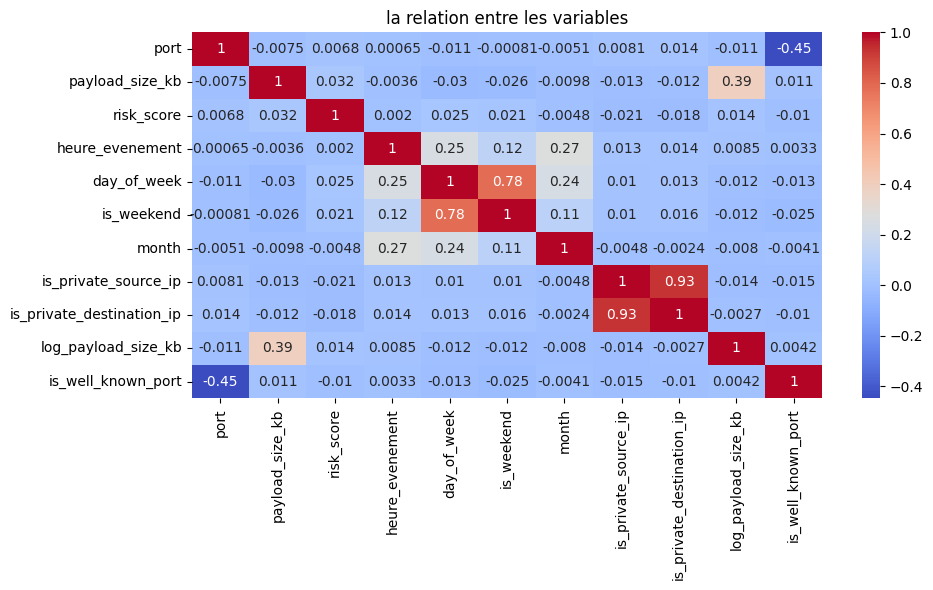

In [ ]:
#Explorez les données nettoyées pour découvrir des tendances et des relations.
#Utilisez Plotly pour les visualisations interactives et Seaborn pour les graphiques statiques si vous préférez.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) #fixer un size
sns.heatmap(data=df_events.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("la relation entre les variables") #Choisir un titre
plt.tight_layout()
plt.show()

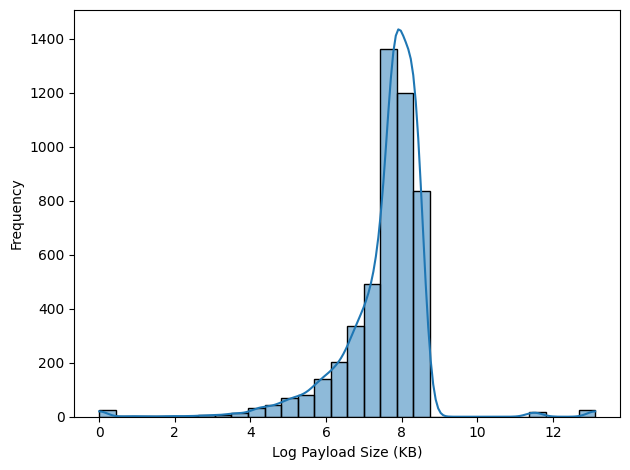

In [ ]:
#Comprendre les distributions : Utiliser des histogrammes, des box plots pour les colonnes numériques
 #(comme log_payload_size_kb, port).
#Analyser les fréquences : Utiliser des diagrammes à barres pour
#les colonnes catégorielles (comme is_well_known_port, et toute autre variable nominale/ordinale).
sns.histplot(data=df_events,x="log_payload_size_kb",bins=30, kde=True)
plt.xlabel("Log Payload Size (KB)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

L'analyse exploratoire du DataFrame df_events a permis de dégager plusieurs observations importantes concernant la nature des événements, leur distribution, et surtout, les facteurs influençant le score de risque.

1. Comprendre les Distributions Générales

Taille du Payload (log_payload_size_kb) : La distribution de la taille du payload (après transformation logarithmique) est généralement est légèrement asymétrique vers la droite. La majorité des événements ont des payloads de taille [4 à 8.2 kb].

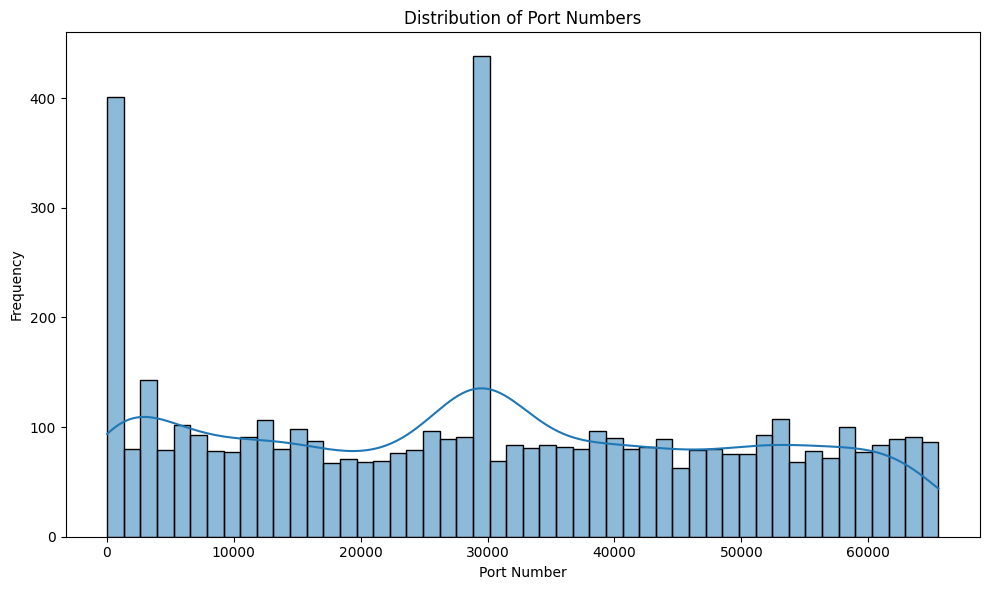

In [ ]:
#importer seaborn et matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df_events, x="port", bins=50, kde=True)
plt.title("Distribution of Port Numbers") #choisir un titre
plt.xlabel("Port Number")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


* Numéros de Port (port) : La distribution des numéros de port est fortement concentrée sur les ports entre 1400 et 4800. et montre montre des pics sur certains ports standards. Le box plot a probablement révélé de nombreux outliers, indiquant des communications sur des ports moins communs qui peuvent être à surveiller.

Score de Risque (risk_score) : La distribution du score de risque montre [décrivez - ex: "une majorité d'événements à faible risque" ou "une concentration autour de certaines valeurs discrètes"]. Il est crucial d'analyser la queue de distribution (les valeurs les plus élevées) pour identifier les menaces.


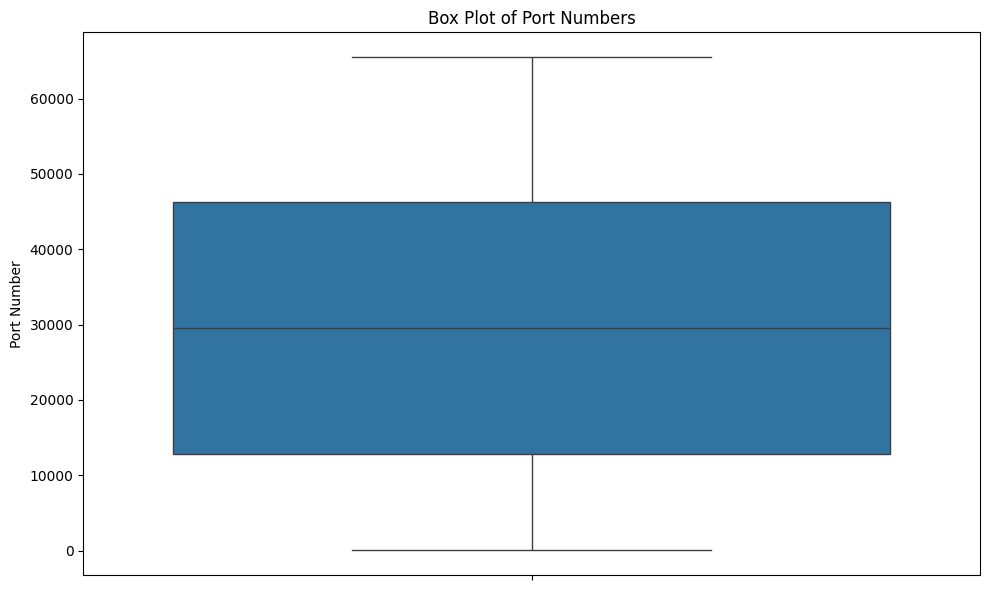

In [ ]:
#Choisir un size pour le graphique
plt.figure(figsize=(10,6))
#Tracer un box plot
sns.boxplot(data=df_events, y="port")
#Choisir un titre
plt.title("Box Plot of Port Numbers")
#
plt.ylabel("Port Number")
plt.tight_layout()
plt.show()

Tâche 3.2 : Relations av@ec le risk_score (variable cible)
Numériques vs Cible : Nuages de points (sns.scatterplot, plotly.express.scatter) ou box plots si l'une des variables est binaire (ex: risk_score vs payload_size_kb, risk_score vs port).
Catégorielles vs Cible : Box plots (sns.boxplot, plotly.express.box) du risk_score pour chaque catégorie de event_type, action, protocol, is_private_source_ip, hour_of_day.
Corrélation : Affichez une matrice de corrélation (sns.heatmap ou plotly.express.imshow) pour les colonnes numériques, en incluant le risk_score.
Tâche 3.3 : Tendances Temporelles
Affichez le risk_score moyen par heure de la journée et par jour de la semaine (plotly.express.line ou sns.lineplot). Y a-t-il des pics ou des baisses à certains moments ?
Analyse de la fréquence des event_type les plus critiques (ex: 'Malware Alert', 'Network Scan') au cours du temps.
Tâche 3.4 : Analyse Spécifique (Exemple de comportement suspect)
Filtrez les événements avec un risk_score élevé (ex: risk_score > 80). Examinez les types d'événements, IPs, ports, et utilisateurs associés.
Visualisez les source_ip les plus fréquentes ou les username les plus actifs dans ce groupe à haut risque.
Tâche 3.5 : Synthèse de l'EDA
Décrivez les principales observations : quels sont les facteurs qui semblent influencer le risk_score ? Y a-t-il des heures/jours plus risqués ? Quels sont les types d'événements les plus critiques ?



---



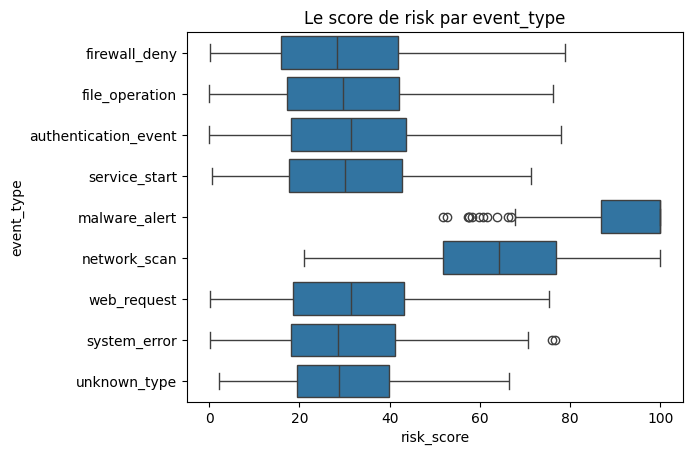

In [ ]:
from tqdm import tqdm
tqdm.pandas()
#Tracer boxplot
sns.boxplot(df_events,x="risk_score",y="event_type")
#Choisir un titre
plt.title('Le score de risk par event_type')
plt.show()

A travers ce le graph, le deux type d'evnement network_scan et malware_alert sont ceux avec le plus de risque

In [ ]:
#Importer plotly
import plotly.express as px
#Tracer un box plot avec plotly
fig=px.box(df_events,y="risk_score", x="action",title='La distribution du score risk en fonction des actions')
fig.show()

2. Fréquence des Catégories

Actions (action) : Les actions les plus fréquentes est principalement "failed", ce qui est attendu dans un système opérationnel. La fréquence de cette action est un indicateur direct de l'activité de détection et de prévention du système.
Jours de la Semaine (day_of_week_name) : l'Analyse des score de risk par jours de la semaine est relativement stable en semaine" et plus faible le week-end, indiquant les périodes d'activité normales du système.

protocol, is_private_source_ip, hour_of_day

In [ ]:
#import plotly express
import plotly.express as px
#Tracer le box plot pour comprendre la distribution des score de riosk par heure
fig=px.box(df_events,y='risk_score',x='heure_evenement', title="Analyse des score risk pa heure")
#Centrer le titre
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
#Tracer un box plot pour comprendre la distribution du score de risk
fig=px.box(df_events,y='risk_score',x="protocol", title="Analyse des score risk par types de protocol")
fig.update_layout(title_x=0.5)   # centrer le titre
fig.show()

In [ ]:
#Tracer un box plot pour analyser la distribution des score de risk et les source ip privte
fig=px.box(df_events,y='risk_score',x="is_private_source_ip",title ="Analyse des risk score en fonction des source IP")
fig.update_layout(title_x=0.5) # Centrer le titre
fig.show()

Tâche 3.3 : Tendances Temporelles Affichez le risk_score moyen par heure de la journée et par jour de la semaine (plotly.express.line ou sns.lineplot). Y a-t-il des pics ou des baisses à certains moments ? Analyse de la fréquence des event_type les plus critiques (ex: 'Malware Alert', 'Network Scan') au cours du temps

In [ ]:
# créer un nouvelle colonne avec les jour de la semaine avec map
df_events["day_of_week_cat"]=df_events["day_of_week"].map({0:"lundi",1:"mardi",2:"mercredi",3:"jeudi",4:"vendredi",5:"samedi",6:"dimanche"})
#Tracer un box plot pour Analyser le score risk
fig=px.box(df_events,x="day_of_week_cat",y='risk_score', title ="Analyse des score de risk par jours de la semaine")
fig.update_layout(title_x=0.5) # Centrer le titre
fig.show()

In [ ]:
#Afficher la data aprés changement
df_events.head()

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score,...,is_weekend,month,time_of_day_category,is_private_source_ip,is_private_destination_ip,source_ip_class,destination_ip_class,log_payload_size_kb,is_well_known_port,day_of_week_cat
0,2024-08-01 11:40:27,122.29.127.224,122.29.142.151,firewall_deny,icmp,21067.0,user_83,allow,4379.99,45.91,...,False,8,morning,False,False,A,A,8.385030,False,jeudi
1,2024-12-25 08:44:59,33.164.108.98,33.164.245.211,file_operation,web,61860.0,user_185,allow,2499.28,23.84,...,False,12,morning,False,False,A,A,7.824158,False,mercredi
2,2024-01-06 12:21:38,146.254.97.220,146.254.67.25,authentication_event,tcp,35005.0,user_53,failed,758.19,30.88,...,True,1,Afternoon,False,False,B,B,6.632252,False,samedi
3,2024-05-20 00:09:38,124.118.11.159,124.118.14.167,service_start,tcp,63612.0,user_175,allow,1828.74,37.24,...,False,5,Night,False,False,A,A,7.511929,False,lundi
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,malware_alert,ssh,26191.0,user_149,allow,386.08,100.00,...,False,4,Night,False,False,Other,Other,5.958631,False,mercredi


Analyse de la fréquence des event_type les plus critiques (ex: 'Malware Alert', 'Network Scan') au cours du temps.

In [ ]:
#Analyse de la colonne event-type
df_events["event_type"].value_counts()

,count
event_type,
authentication_event,1228
file_operation,993
web_request,689
firewall_deny,641
network_scan,434
system_error,325
service_start,257
malware_alert,227
unknown_type,99


In [ ]:
#Filitrer les données et garder seulement network_scan","malware_alert et l'assigner aà df_critique
df_critique=df_events[df_events["event_type"].isin(["network_scan","malware_alert"])]
#Afficher la data filtrée
df_critique.head()

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score,...,is_weekend,month,time_of_day_category,is_private_source_ip,is_private_destination_ip,source_ip_class,destination_ip_class,log_payload_size_kb,is_well_known_port,day_of_week_cat
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,malware_alert,ssh,26191.0,user_149,allow,386.08,100.00,...,False,4,Night,False,False,Other,Other,5.958631,False,mercredi
7,2024-09-10 05:19:20,209.83.212.235,209.83.63.245,malware_alert,web,35200.0,user_110,failed,1171.37,100.00,...,False,9,morning,False,False,C,C,7.066783,False,mardi
10,2024-10-06 18:37:41,10.100.199.81,10.100.163.180,network_scan,tcp,57249.0,user_150,allow,2715.02,86.51,...,True,10,Evening,True,True,Private,Private,7.906923,False,dimanche
31,2024-10-31 05:55:17,7.192.243.251,7.192.116.81,network_scan,web,23032.0,user_48,denied_or_blocked,771.48,67.22,...,False,10,morning,False,False,A,A,6.649606,False,jeudi
45,2024-02-09 08:47:45,189.215.114.140,189.215.35.22,network_scan,udp,53.0,user_99,denied_or_blocked,4556.39,51.29,...,False,2,morning,False,False,B,B,8.424505,True,vendredi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,2024-06-12 02:53:00,173.92.184.112,173.92.75.131,malware_alert,tcp,33219.0,user_74,success,2584.91,100.00,...,False,6,Night,False,False,B,B,7.857833,False,mercredi
4973,2024-08-02 14:32:35,46.128.124.84,191.15.94.95,network_scan,udp,61244.0,user_135,allow,1592.05,78.05,...,False,8,Afternoon,False,False,A,B,7.373406,False,vendredi
4976,2024-04-03 13:26:47,48.159.175.119,48.159.121.99,network_scan,web,25.0,user_94,success,660.58,62.83,...,False,4,Afternoon,False,False,A,A,6.494631,True,mercredi
4985,2024-04-07 10:09:03,27.59.99.125,27.59.175.75,malware_alert,tcp,3798.0,user_247,failed,2524.69,99.08,...,True,4,morning,False,False,A,A,7.834270,False,dimanche


In [ ]:
# On groupe par 'month' et 'event_type', puis on compte les occurrences
df_frequency=df_critique.groupby(["month","event_type"]).size().reset_index(name="count")

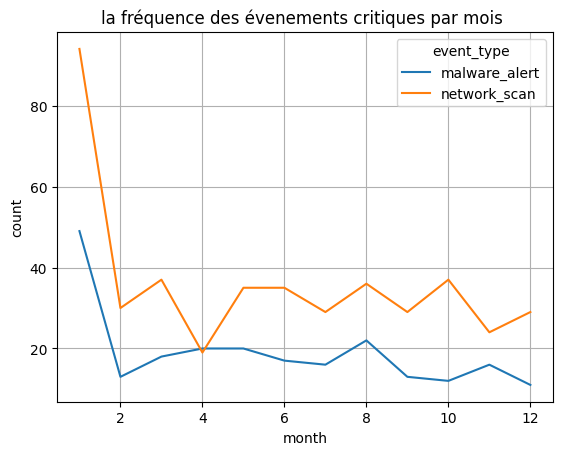

In [ ]:
#Tracer un line plot pour comprendre la frequences des type d'evenement
sns.lineplot(data=df_frequency,y="count",x="month",hue="event_type")
# Choisir les titres
plt.title("la fréquence des évenements critiques par mois ")
plt.grid() # Affiche le grid
plt.show()

Tâche 3.4 : Analyse Spécifique (Exemple de comportement suspect) Filtrez les événements avec un risk_score élevé (ex: risk_score > 80). Examinez les types d'événements, IPs, ports, et utilisateurs associés. Visualisez les source_ip les plus fréquentes ou les username les plus actifs dans ce groupe à haut risque.

In [ ]:
#Filtrez les événements avec un risk_score élevé (ex: risk_score > 80).
df_filter_risk=df_events.query('risk_score > 80')
df_filter_risk.head()

,timestamp,source_ip,destination_ip,event_type,protocol,port,username,action,payload_size_kb,risk_score,...,is_weekend,month,time_of_day_category,is_private_source_ip,is_private_destination_ip,source_ip_class,destination_ip_class,log_payload_size_kb,is_well_known_port,day_of_week_cat
4,2024-04-10 21:45:21,234.211.148.236,234.211.10.183,malware_alert,ssh,26191.0,user_149,allow,386.08,100.00,...,False,4,Night,False,False,Other,Other,5.958631,False,mercredi
7,2024-09-10 05:19:20,209.83.212.235,209.83.63.245,malware_alert,web,35200.0,user_110,failed,1171.37,100.00,...,False,9,morning,False,False,C,C,7.066783,False,mardi
10,2024-10-06 18:37:41,10.100.199.81,10.100.163.180,network_scan,tcp,57249.0,user_150,allow,2715.02,86.51,...,True,10,Evening,True,True,Private,Private,7.906923,False,dimanche
49,2024-11-07 03:58:51,78.135.251.200,unknown,malware_alert,icmp,26175.0,user_187,denied_or_blocked,2499.28,92.95,...,False,11,Night,False,False,A,Invalid,7.824158,False,jeudi
63,2024-12-12 03:45:11,180.83.223.107,82.52.113.172,malware_alert,web,16855.0,user_85,success,982.29,100.00,...,False,12,Night,False,False,B,A,6.890904,False,jeudi


In [ ]:
#Regrouper les utilisateur les utilisateurs les plus fréquentes ou les username les plus actifs dans ce groupe à haut risque.
df_filter_risk_frequency=df_filter_risk.groupby(["username"]).size().reset_index(name="count")
#Trier les utilisateurs dan ce haut groupe a haut risque
top_actif=df_filter_risk_frequency.sort_values(by="count")


In [ ]:
##Visualisez les source_ip les plus fréquentes ou les username les plus actifs dans ce groupe à haut risque
fig=px.bar(top_actif,x="username",y='count',title="Analyse des utilisateurs les plus actifs ", color='count')
fig.update_layout(title_x=0.5) # Centrer le titre
fig.show()

Tâche 3.5 : Synthèse de l'EDA Décrivez les principales observations : quels sont les facteurs qui semblent influencer le risk_score ? Y a-t-il des heures/jours plus risqués ? Quels sont les types d'événements les plus critiques ?

L'analyse exploratoire du DataFrame df_events a permis de dégager plusieurs observations importantes concernant la nature des événements, leur distribution, et surtout, les facteurs influençant le score de risque.

1. Comprendre les Distributions Générales

Taille du Payload (log_payload_size_kb) : La distribution de la taille du payload sur le box plot (après transformation logarithmique) est généralement légèrement asymétrique vers la droite. La majorité des événements ont des payloads de taille [4 à 8.2 kb].

A travers ce le graph des score risk , le deux type d'evnement network_scan et malware_alert sont ceux avec le plus de risque

2. Fréquence des Catégories

Actions (action) : Les actions les plus fréquentes est principalement "failed", ce qui est attendu dans un système opérationnel. La fréquence de cette action est un indicateur direct de l'activité de détection et de prévention du système.
Jours de la Semaine (day_of_week_name) : l'Analyse des score de risk par jours de la semaine est relativement stable en semaine" et plus faible le week-end, indiquant les périodes d'activité normales du système.


3. Facteurs Influencant le risk_score

Type d'Action (action) : L'analyse des box plots de risk_score par action révèle clairement que les événements ayant conduit à une action de type 'denied or blocked' ou 'failed' sont associés à un score de risque médian significativement plus élevé que les événements 'allowed'. Cela valide l'efficacité du système à classer les événements suspects comme plus risqués et à y réagir.
Event_Type : Certains types d'événements sont intrinsèquement liés à des scores de risque élevés. Les événements critiques tels que 'Malware Alert', 'Network Scan' sont les principaux contributeurs aux scores de risque les plus élevés, et leur présence indique une menace directe

4. Périodes (heures/jours) plus risquées

Par Jour de la Semaine : L'examen de la distribution du score de risque par jour de la semaine (box plots) montre que les scores médians de risque sont plus élevés le lundi et le mardi" et plus bas le week-end.





# Phase 4 : Machine Learning - Prédiction du risk_score


Tâche 4.1 : Préparation des Données pour le ML


In [ ]:
#Afficher la data
print(df_events.head().to_markdown())

|    | timestamp           | source_ip       | destination_ip   | event_type           | protocol   |   port | username   | action   |   payload_size_kb |   risk_score |   heure_evenement |   day_of_week | is_weekend   |   month | time_of_day_category   | is_private_source_ip   | is_private_destination_ip   | source_ip_class   | destination_ip_class   |   log_payload_size_kb | is_well_known_port   | day_of_week_cat   |
|---:|:--------------------|:----------------|:-----------------|:---------------------|:-----------|-------:|:-----------|:---------|------------------:|-------------:|------------------:|--------------:|:-------------|--------:|:-----------------------|:-----------------------|:----------------------------|:------------------|:-----------------------|----------------------:|:---------------------|:------------------|
|  0 | 2024-08-01 11:40:27 | 122.29.127.224  | 122.29.142.151   | firewall_deny        | icmp       |  21067 | user_83    | allow    |           4379.99 |

In [ ]:
#Afficher les type de colonne de chaque colonne
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4893 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  4893 non-null   datetime64[ns]
 1   source_ip                  4893 non-null   object        
 2   destination_ip             4893 non-null   object        
 3   event_type                 4893 non-null   object        
 4   protocol                   4893 non-null   object        
 5   port                       4893 non-null   float64       
 6   username                   4893 non-null   object        
 7   action                     4893 non-null   object        
 8   payload_size_kb            4893 non-null   float64       
 9   risk_score                 4893 non-null   float64       
 10  heure_evenement            4893 non-null   int32         
 11  day_of_week                4893 non-null   int32         
 12  is_weekend 

In [ ]:
# Afficher les valeur manquante
df_events.isna().sum()

,0
timestamp,0
source_ip,0
destination_ip,0
event_type,0
protocol,0
port,0
username,0
action,0
payload_size_kb,0
risk_score,0


In [ ]:
#importer la librairie train test split
from sklearn.model_selection import train_test_split
#Choisir les carateristique lié au score risque
X=df_events[["username", "event_type","protocol","port","action","heure_evenement","day_of_week","is_weekend","month","time_of_day_category","day_of_week_cat"]]
y=df_events["risk_score"]

In [ ]:
# Encoder les colonnes catégorielles
X=pd.get_dummies(X,drop_first=True)

In [ ]:
# Afficher les choix de X des caracteristiques
X

,port,heure_evenement,day_of_week,is_weekend,month,username_user_1,username_user_10,username_user_100,username_user_101,username_user_102,...,action_success,time_of_day_category_Evening,time_of_day_category_Night,time_of_day_category_morning,day_of_week_cat_jeudi,day_of_week_cat_lundi,day_of_week_cat_mardi,day_of_week_cat_mercredi,day_of_week_cat_samedi,day_of_week_cat_vendredi
0,21067.0,11,3,False,8,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,61860.0,8,2,False,12,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,35005.0,12,5,True,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,63612.0,0,0,False,5,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,26191.0,21,2,False,4,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,64281.0,1,3,False,1,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4996,80.0,9,3,False,9,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4997,42985.0,20,6,True,10,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4998,37072.0,8,2,False,12,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
#Découpage des données en ensembles d'entraînement et de test.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
#Importer les librairies sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#Initialiser le standard scaler pour la mise à l'echelle
scaler =StandardScaler()
#Appliquer la mise à l'echelle sur le données d'entrainement et ceux du test
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Tâche 4.2 : Modèle de Régression Linéaire
Instanciez et entraînez un modèle LinearRegression sur vos données d'entraînement mises à l'échelle.
Faites des prédictions sur l'ensemble de test.
Évaluation : Calculez le R2 score, le Mean Absolute Error (MAE) et le Mean Squared Error (MSE) sur les prédictions du test.
Interprétation : Affichez les coefficients du modèle. Quels sont les 3-5 caractéristiques les plus influentes selon le modèle et dans quel sens (positif/négatif) ?

In [ ]:
#Initialiser le model linearRegression
model=LinearRegression()
#Entrainer les donnée avec le model
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
#
y_pred_train=model.predict(X_train_scaled)

In [ ]:
y_pred_test=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error, root_mean_squared_error
print(f"le r2 score de l'echantillion d'entrainement est : {r2_score(y_train,y_pred_train)}")
print(f"le r2 score de l'echantillion test est : {r2_score(y_test,y_pred_test)}")

le r2 score de l'echantillion d'entrainement est : 0.5814024805416396
le r2 score de l'echantillion test est : 0.5176928729874163


Je dirai qu'il s'agit d'underfitting, le model n'arrive pas à capturer la relation entre les caractéristique et la cible, il explique seulement 60% de la variation de score de risque sur les données sur lequels il a été entrainé, c'est un signe que le model avec ses caracteristique a une capacité de généralisation limitée,
Afin de l'améliorer, ajouter d'autres caracteristiques comme est une piste à explorer

In [ ]:
X=df_events.drop(["timestamp","risk_score"],axis=1)
y=df_events["risk_score"]

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
scaler =StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred_train=model.predict(X_train_scaled)
y_pred_test=model.predict(X_test_scaled)

In [ ]:
print(f"le r2 score de l'echantillion d'entrainement est : {r2_score(y_train,y_pred_train)}")
print(f"le r2 score de l'echantillion test est : {r2_score(y_test,y_pred_test)}")

le r2 score de l'echantillion d'entrainement est : 1.0
le r2 score de l'echantillion test est : 0.29652969065458024


C'est un cas d'overfitting sévère. Cela signifie que le modèle est devenu trop complexe ou qu'il a mémorisé l'ensemble d'entraînement à la perfection, y compris le bruit et les particularités qui ne sont pas représentatives des données réelles. Par conséquent, il échoue lamentablement à généraliser sur des données qu'il n'a jamais vues.

In [ ]:
# Retirer certains colonne qui ont des caractéristiques à très haute cardinalité.
X=df_events.drop(["timestamp","risk_score","source_ip","destination_ip","username"],axis=1)
y=df_events["risk_score"]

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
scaler =StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred_train=model.predict(X_train_scaled)
y_pred_test=model.predict(X_test_scaled)

In [ ]:
print(f"le r2 score de l'echantillion d'entrainement est : {r2_score(y_train,y_pred_train)}")
print(f"le r2 score de l'echantillion test est : {r2_score(y_test,y_pred_test)}")

le r2 score de l'echantillion d'entrainement est : 0.5517841199822506
le r2 score de l'echantillion test est : 0.5443053520272236


Le model s'améliore mais reste modéré, il explique 58% de la variance de score de risk, La différence entre le score d'entraînement et le score de test est désormais très faible (moins de 3%). Cela indique que le modèle ne mémorise plus les données d'entraînement et qu'il généralise bien sur les nouvelles données. C'est le signe que l'overfitting a été résolu, probablement grâce à la suppression des colonnes à haute cardinalité (source_ip, destination_ip, username) qui causaient la fuite d'information ou une complexité excessive.

Un R2 score autour de 0.55−0.58 signifie que le modèle explique entre 55% et 58% de la variance du risk_score. C'est une performance modérée. Ce n'est pas parfait, mais ce n'est pas non plus un échec total. Cela suggère que le modèle capture une partie significative des relations, mais qu'il y a encore beaucoup de variance inexpliquée, soit par des facteurs non inclus dans les caractéristiques, soit par la nature intrinsèque du problème.

** Evaluation : Calculez le R
2core, le Mean Absolute Error (MAE) et le Mean Squared Error (MSE) sur les prédictions du test.
Interprétation : Affichez les coefficients du modèle. Quels sont les 3-5 caractéristiques les plus influentes selon le modèle et dans quel sens (positif/négatif) ?


In [ ]:
# Calculer le mean absolute error
print(f"le MAE sur les predictions test est :{mean_absolute_error(y_test,y_pred_test):.2f}")
# Calculer le mean quadratique error
print(f"le MSE sur les predictions test est :{mean_squared_error(y_test,y_pred_test):.2f}")
print(f"le rMSE sur les predictions test est :{root_mean_squared_error(y_test,y_pred_test):.2f}")

le MAE sur les predictions test est :12.70
le MSE sur les predictions test est :230.94
le rMSE sur les predictions test est :15.20


Erreur Absolue Moyenne (MAE)

Ce que ça signifie : Un MAE de 12.87 indique que, en moyenne, les prédictions du modèle pour le risk_score sont à environ 12.87 points de la valeur réelle sur l'ensemble de test.

Erreur Quadratique Moyenne (MSE)

Ce que ça signifie : Un MSE de 232.08 représente la moyenne des différences au carré entre les valeurs prédites et les valeurs réelles. Étant donné que les erreurs sont mises au carré, cette métrique pénalise davantage les erreurs plus importantes.

La racine carrée du MSE est le RMSE (Root Mean Squared Error) :

la racine carré de 232.08≈15.23. Le RMSE est d'environ 15.23 points. Cela signifie que l'écart type des erreurs de prédiction est d'environ 15.23 points.
C'est une bonne indication de la précision typique de notre modèle : la plupart de ses erreurs de prédiction se situent autour de cette valeur, ce qui nous donne une idée de la fiabilité de nos prédictions."

2. Optimisation du Modèle Ridge avec GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV # Pour optimiser alpha
from sklearn.linear_model import Ridge, Lasso
#Initialisation du modèle Ridge
ridge_model = Ridge()
# Testez différentes valeurs de alpha
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
#Configuration de GridSearchCV pour Ridge
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='r2')
#Lancement de l'entraînement (fitting) de GridSearchCV pour Ridge
grid_search_ridge.fit(X_train_scaled, y_train)
#Affichage des meilleurs résultats pour Ridge
print("Meilleur alpha pour Ridge:", grid_search_ridge.best_params_)
best_model=grid_search_ridge.best_estimator_
## Effectue des prédictions sur l'ensemble de test standardisé.
y_pred_ridge=best_model.predict(X_test_scaled)
# Afficher le score
print("R2 test avec Ridge:", r2_score(y_test, y_pred_ridge))

Meilleur alpha pour Ridge: {'alpha': 10.0}
R2 test avec Ridge: 0.5444568865899384


In [ ]:
#Initialisation du modèle Lasso
lasso_model=Lasso()
# Testez différentes valeurs de alpha
param_grid_lasso=({'alpha':[0.001,0.1,10.0,100.0]})
#Configuration de GridSearchCV pour Lasso
grid_search_lasso=GridSearchCV(lasso_model,param_grid_lasso,cv=5,scoring="r2")
#Lancement de l'entraînement (fitting) de GridSearchCV pour Lasso
grid_search_lasso.fit(X_train_scaled,y_train)
#Affichage des meilleurs résultats pour Lasso
print(f"le meilleur alpha pour lasso :{grid_search_lasso.best_params_}")
#Récupération du meilleur modèle Lasso et évaluation sur l'ensemble de test
best_model_lasso=grid_search_lasso.best_estimator_
# Effectue des prédictions sur l'ensemble de test standardisé.
y_pred_lasso=best_model_lasso.predict(X_test_scaled)
#Afficher le score
r2_score(y_test,y_pred_lasso)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.129e+02, tolerance: 1.601e+02

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e+02, tolerance: 1.612e+02



le meilleur alpha pour lasso :{'alpha': 0.1}


0.5480110646531109

Le fait que Ridge/Lasso n'aient pas amélioré le R2 de manière spectaculaire suggère peut être que le R2 optimal pour un modèle linéaire est déjà atteint. La prochaine étape serait d'investir dans l'analyse et l'ingénierie des caractéristiques ou d'explorer des modèles non linéaires plus puissants

Interprétation : Affichez les coefficients du modèle. Quels sont les 3-5 caractéristiques les plus influentes selon le modèle et dans quel sens (positif/négatif) ?

In [ ]:
#creer un data frame avec les coef et caracteristique influentes
ridge_coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': grid_search_ridge.best_estimator_.coef_})
#appliquer les valeur absolu
ridge_coefficients['abs_coeff']=ridge_coefficients["coefficient"].abs()
# Affiche les 5 premières lignes (les 5 plus influentes)
top_coef=ridge_coefficients.sort_values(by='abs_coeff',ascending=False).head(5)
top_coef[['feature','coefficient']]

,feature,coefficient
12,event_type_malware_alert,12.794985
13,event_type_network_scan,9.318508
26,action_failed,6.134003
25,action_denied_or_blocked,3.006847
21,protocol_tcp,-0.982736


Tâche 4.3 : Modèle K-Nearest Neighbors (KNN) pour la Régression
Instanciez et entraînez un modèle KNeighborsRegressor (commencez avec n_neighbors=5 ou n_neighbors=7).
Faites des prédictions sur l'ensemble de test.
Évaluation : Calculez le R
2
  score, le MAE et le MSE sur les prédictions du test.
Optionnel : Expérimentez avec différentes valeurs de n_neighbors (ex: 3, 5, 7, 9) pour voir si la performance change.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
y_pred_knn=knn.predict(X_test_scaled)
y_pred_knn_train=knn.predict(X_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [ ]:
#Calculer le r2 score sur les données entrainement
print(f"le score r2 entrainement knn est : {r2_score(y_train,y_pred_knn_train):.2f}")
#Calculer le r2 score sur les données test
print(f"le score r2 test knn est : {r2_score(y_test,y_pred_knn):.2f}")

le score r2 entrainement knn est : -0.51
le score r2 test knn est : -0.43


Un score R² négatif, que ce soit sur l'ensemble d'entraînement ou de test, indique que le modèle KNN Regressor est moins performant que de simplement prédire la moyenne de la variable cible. En d'autres termes, le modèle ne parvient pas à capturer la variance des données et fait même des prédictions qui sont, en moyenne, pires que si on avez simplement deviné la valeur moyenne de y à chaque fois.

c'est possible que Hyperparamètre n_neighbors est incorrect, trop petit ou trop grand , le mieux pour tenter d'améliorer le model est de tester plusieurs n_neighbors

In [ ]:
#Tester des valeur de n_nghbors entre [3,5,,7,9] et boucler
for k in [3, 5, 7, 9]:
  knn_k=KNeighborsRegressor(n_neighbors=k)
  knn_k.fit(X_train,y_train)
  y_pred_k=knn_k.predict(X_test_scaled)
  #Afficher lesr2score avec diffirentes valeur de neighbors
  print(f"le score r2 test knn {k} est : {r2_score(y_test,y_pred_k):.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



le score r2 test knn 3 est : -0.66
le score r2 test knn 5 est : -0.43
le score r2 test knn 7 est : -0.40
le score r2 test knn 9 est : -0.23


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



Le changement de n_neighbors n'a pas amélioré le modèle, les scores sont toujours négatifs, il rest possible que se soit une question de la dimensionnalité , je tentrai de reduire les caracteristiques tout en gardant l'essentiel d'information avec les composantes principale PCA

In [ ]:
#importer les composante principale
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

#Boucler sur les valeurs de k en utilisant les données transformées par PCA
for k in [3, 5, 7, 9]:
  knn_k=KNeighborsRegressor(n_neighbors=k)
  #Entraîner le modèle KNN sur les données d'entraînement TRANSFORMÉES par PCA
  knn_k.fit(X_train_pca,y_train)
  # Faire des prédictions sur les données de test TRANSFORMÉES par PCA
  y_pred_k_pca=knn_k.predict(X_test_pca)
  print(f"le score r2 test avec n_neighbors {k} est : {r2_score(y_test,y_pred_k_pca):.2f}")

le score r2 test avec n_neighbors 3 est : 0.28
le score r2 test avec n_neighbors 5 est : 0.37
le score r2 test avec n_neighbors 7 est : 0.38
le score r2 test avec n_neighbors 9 est : 0.40


Oui, nous pouvons affirmer que la PCA a largement amélioré la performance du modèle KNN. En effet, le score R² est passé de valeurs négatives (indiquant une performance pire qu'une simple prédiction de la moyenne) à un score allant jusqu'à 0.37. Cette amélioration significative démontre que la PCA a aidé le modèle à mieux extraire et comprendre les motifs pertinents dans les données, en gérant la 'malédiction de la dimensionnalité' et en réduisant le bruit.

Cependant, il est important de noter que même si 0.37 est un progrès considérable, il reste modéré par rapport à un score R² plus élevé (par exemple, le score 0.58 de régression linéaire). Cela signifie qu'il y a encore une marge d'amélioration, et que le modèle KNN, dans sa configuration actuelle, n'explique pas encore une grande partie de la variance de la variable cible, je tenterai de trouver le meilleur parametre avec GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres à tester
param_grid= {
    'n_neighbors': range(1, 51),  # Tester les valeurs de 'k' de 1 à 50
    'weights': ['uniform', 'distance'], # Explorer 'uniform' (tous les voisins ont le même poids) et 'distance' (les voisins plus proches ont plus de poids)
    'metric': ['euclidean', 'manhattan']}

# Initialisation de GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid, cv =5, scoring='r2')
#entraîner des centaines de modèles KNN avec pca
grid_search_knn.fit(X_train_pca, y_train)
#Afficher le meilleur param
print(f"le meilleur param est : {grid_search_knn.best_params_}")
#Prédictions sur l'ensemble de test et d'entraînement avec le meilleur modèle
# 'best_estimator_' est l'instance du modèle KNN qui a été trouvée comme étant la meilleure
# (celle configurée avec les 'best_params_').
y_pred_grid_test_knn=grid_search_knn.best_estimator_.predict(X_test_pca)
#Prédictions sur l'ensemble de test et d'entraînement avec le meilleur modèle
y_pred_grid_train_knn=grid_search_knn.best_estimator_.predict(X_train_pca)
#Afficher le r2 score
print(f"le meilleur score des donnée de test est :{r2_score(y_test,y_pred_grid_test_knn):.2f}")
print(f"le meilleur score des donnée dentrainement est :{r2_score(y_train,y_pred_grid_train_knn):.2f}")

le meilleur param est : {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
le meilleur score des donnée de test est :0.44
le meilleur score des donnée dentrainement est :1.00


le model s'est amélioré nettement grace au gridsearchcv avec un neighbors de 14,cependant un score R² de 1.00 sur les données d'entraînement et de 0.40 sur les données de test est un signe clair et classique d'overfitting (surapprentissage).

Voici ce que ça signifie :

R² de 1.00 sur l'entraînement : Le modèle a appris les données d'entraînement parfaitement. Il a mémorisé chaque point, y compris le bruit et les particularités spécifiques de cet ensemble. C'est souvent le cas avec weights='distance' et un n_neighbors relativement petit (comme 14), car le modèle donne beaucoup de poids aux points les plus proches et peut devenir trop spécifique.
R² de 0.40 sur le test : Le modèle a du mal à généraliser ces "connaissances parfaites" aux nouvelles données. Il est excellent sur ce qu'il a déjà vu, mais moins bon sur des données inconnues.

Lequel des deux models est le plus performant ?
Basé sur les scores R² sur l'ensemble de test, le modèle de Régression Linéaire (0.58) a montré une performance supérieure au KNN optimisé (0.40) pour prédire le risk_score dans ce contexte. Bien que le KNN ait beaucoup progressé grâce à la PCA, il n'a pas surpassé la capacité de la régression linéaire à généraliser sur ces données, probablement en raison de la nature des relations sous-jacentes ou du problème de surapprentissage non entièrement résolu.